# Explore fault data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio

# Visualize 3d origin data

In [2]:
root_path = "/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data"
ori_seis = segyio.tools.cube(os.path.join(root_path, 'mig_fill.sgy'))
ori_label = segyio.tools.cube(os.path.join(root_path, 'label_fill.sgy'))

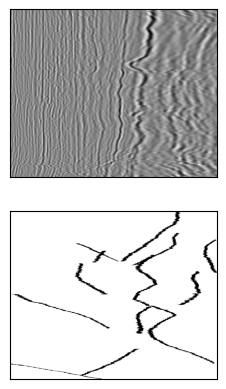

In [8]:
slice_id = 400
plt.subplot(2,1,1)
fig = plt.imshow(ori_seis[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(ori_label[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Visualize 3d crop data

In [12]:
scr_root_path = os.path.join(root_path, 'crop')
data_split = 'train'
data_lst = os.listdir(os.path.join(scr_root_path, data_split))
index = 2
with h5py.File(os.path.join(scr_root_path, data_split, data_lst[index]), 'r') as f:
    seis = f['raw'][:]
    label = f['label'][:]

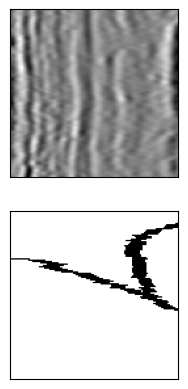

In [14]:
slice_id = 0
plt.subplot(2,1,1)
fig = plt.imshow(seis[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(label[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()